<a href="https://colab.research.google.com/github/albertotrunk/UE5-Dream/blob/main/03_img2img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy
%pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-2jg9_m15
  Running command git clone -q https://github.com/huggingface/diffusers.git /tmp/pip-req-build-2jg9_m15
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.8 MB 33.4 MB/s 
     |████████████████████████████████| 191 kB 77.8 MB/s 
     |████████████████████████████████| 33.8 MB 186 kB/s 
     |████████████████████████████████| 182 kB 84.1 MB/s 
     |████████████████████████████████| 7.6 MB 63.0 MB/s 
  Created wheel for diffusers: filename=diffusers-0.11.0.dev0-py3-none-any.whl size=513104 sha256=318f6d0fdc60936d3d270d3646bce0522a98826e605701222b1e915a992656a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-muci3qlg/wheels/28/16/cf/d8d37579fd1e7edb978252d850ec9328b055a7582ddfae3b87
Succes

In [2]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline


model_id = "prompthero/openjourney"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")



Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/308 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

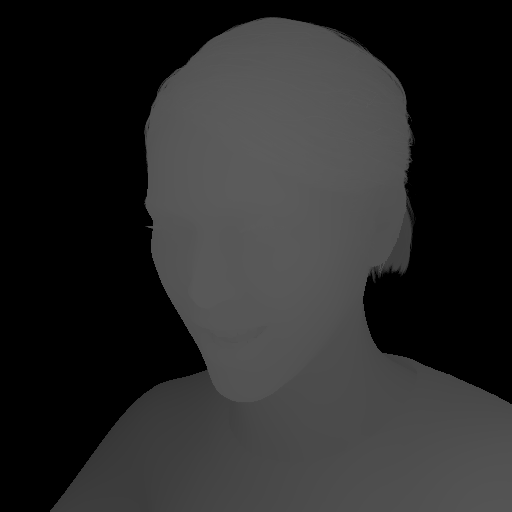

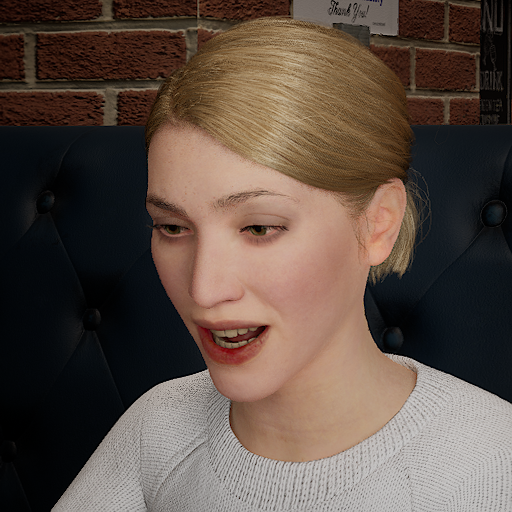

uint8 0 92
float64 0.0 0.3607843137254902


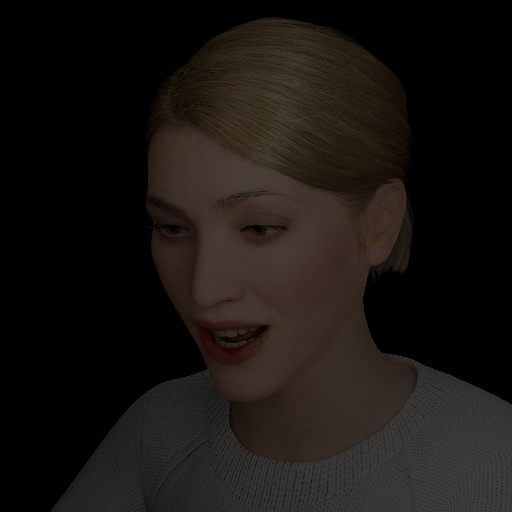

In [3]:
import requests
from PIL import Image
from IPython.display import display
import numpy as np
from torchvision.transforms import GaussianBlur

url_mask = "https://raw.githubusercontent.com/albertotrunk/depth2video/main/example/depth.png?raw=true" #@param {type:"string"}
mask_image = Image.open(requests.get(url_mask, stream=True).raw).convert('RGB')
display(mask_image)

url_init = "https://raw.githubusercontent.com/albertotrunk/depth2video/main/example/color.png?raw=true" #@param {type:"string"}
init_image = Image.open(requests.get(url_init, stream=True).raw).convert('RGB')
display(init_image)


src = np.array(init_image)
mask = np.array(mask_image)

print(mask.dtype, mask.min(), mask.max())
# uint8 0 255

mask = mask / 255

print(mask.dtype, mask.min(), mask.max())
# float64 0.0 1.0

dst = src * mask

masked_img = Image.fromarray(dst.astype(np.uint8))
masked_img


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

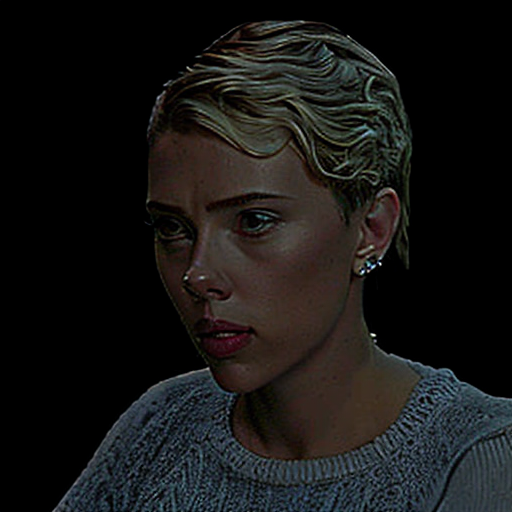

In [4]:
from diffusers import DDIMScheduler

#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
prompt = "a photo of Scarlett Johansson with a short haircut wearing a white sweater, sharp focus, sharp" #@param {type:"string"}
negative_prompt = "border, frame, lowres, jpeg artifacts, low quality, normal quality, worst quality, poorly drawn, error. abstract, asymmetrical, blurry, cropped, disconnected, duplicate, extra, missing, signature, text, username, watermark. amputee, bad anatomy, deformed, disfigured, disproportionate, eye bags, fused, malformed, morbid, mutated, mutation, mutilated, hands, fingers,bad hand,extra limbs,missing limb,extra leg,missing leg,missing hand,extra hand"  #@param {type:"string"}

pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
torch.manual_seed(0)
image1 = pipe(num_inference_steps=30, prompt=prompt, image=masked_img, strength=0.41, guidance_scale=3.5, negative_prompt=negative_prompt).images[0]

image1

torch.manual_seed(0)
image2 = pipe(num_inference_steps=50, prompt=prompt, image=image1, strength=0.41, guidance_scale=3.5, negative_prompt=negative_prompt).images[0]

image2


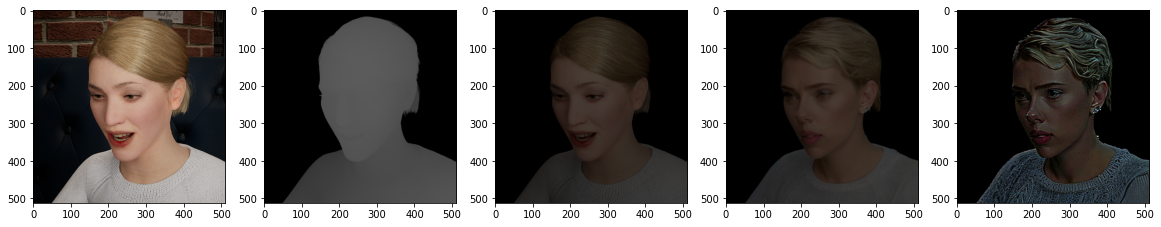

In [5]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = [init_image,mask_image,masked_img,image1,image2]


plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [6]:
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection



xmin: 0.2807350158691406
ymin: 0.29388898611068726
width: 0.4647083282470703
height: 0.46463459730148315

width:   512
height:  512


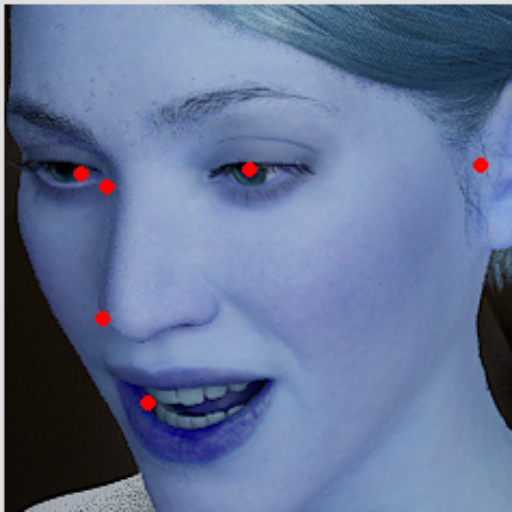

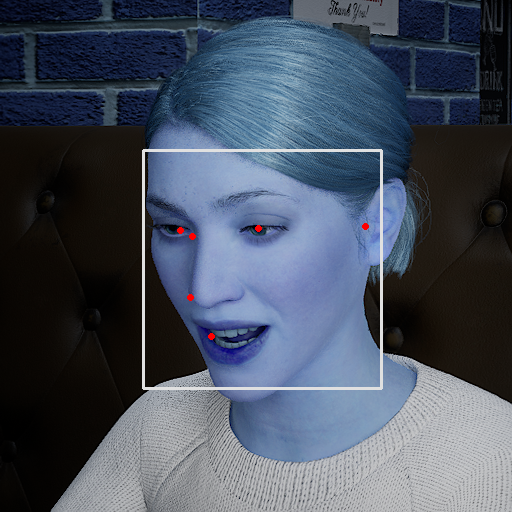

xmin: 0.26651400327682495
ymin: 0.28424182534217834
width: 0.48390936851501465
height: 0.48383399844169617

width:   512
height:  512


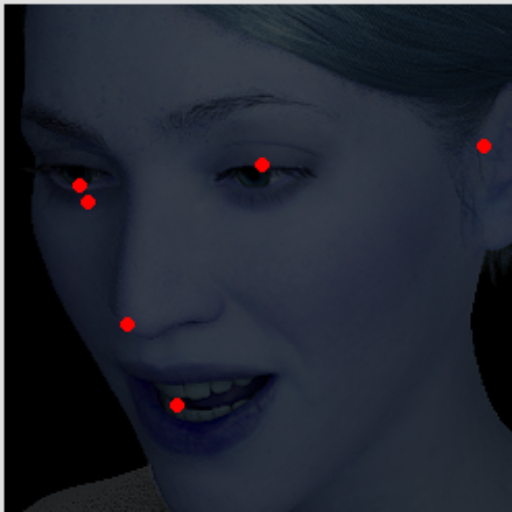

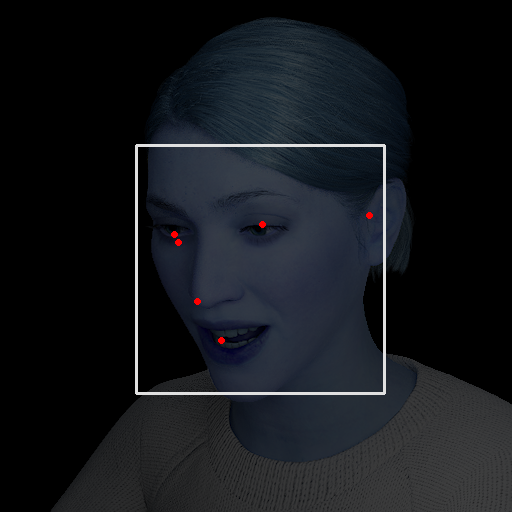

xmin: 0.27573883533477783
ymin: 0.31443777680397034
width: 0.44750672578811646
height: 0.44744113087654114

width:   512
height:  512


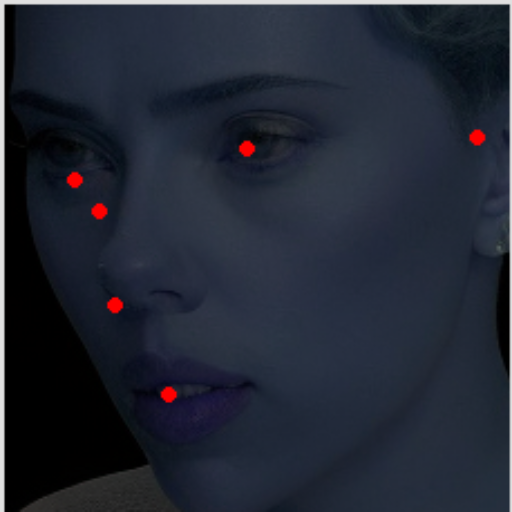

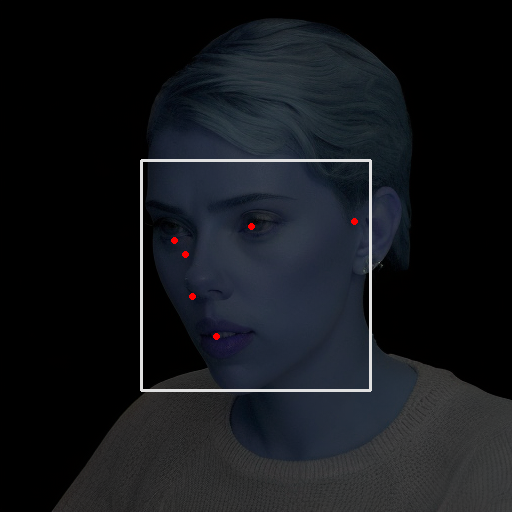

xmin: 0.281135231256485
ymin: 0.3220156729221344
width: 0.4198821485042572
height: 0.4198319613933563

width:   512
height:  512


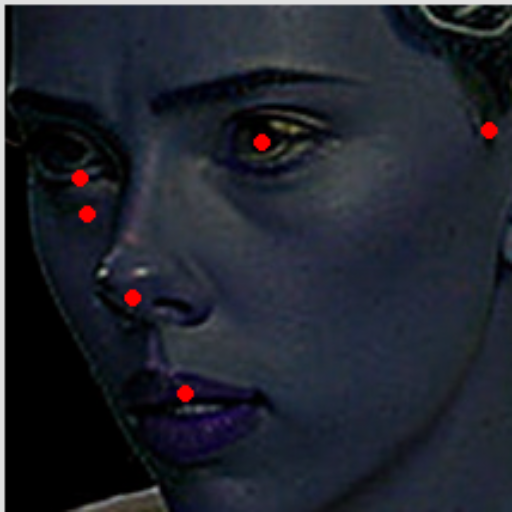

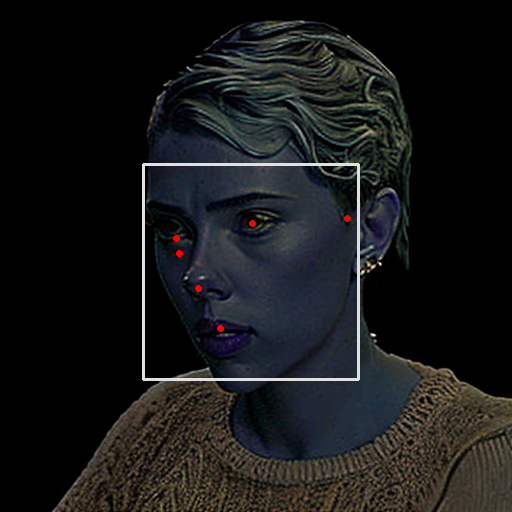

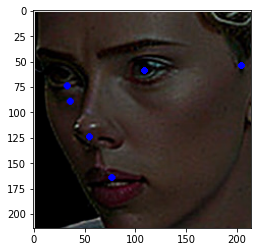

In [7]:
import cv2
from google.colab.patches import cv2_imshow
import math
import dlib
from skimage import io
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

DESIRED_HEIGHT = 512
DESIRED_WIDTH = 512

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)


with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=0) as face_detection:
  for image in images:
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    image = np.array(image)
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    
      data = detection.location_data.relative_bounding_box
      print(data)


      h, w, c = annotated_image.shape
      print('width:  ', w)
      print('height: ', h)
      xleft = data.xmin*w
      xleft = int(xleft)
      xtop = data.ymin*h
      xtop = int(xtop)
      xright = data.width*w + xleft
      xright = int(xright)
      xbottom = data.height*h + xtop
      xbottom = int(xbottom)
      detected_faces = [(xleft, xtop, xright, xbottom)]

      for n, face_rect in enumerate(detected_faces):
        face = Image.fromarray(annotated_image).crop(face_rect)
        face_np = np.asarray(face)
        plt.imshow(face_np)
        resize_and_show(face_np)

      resize_and_show(annotated_image)



In [8]:
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

# Load drawing_utils and drawing_styles
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

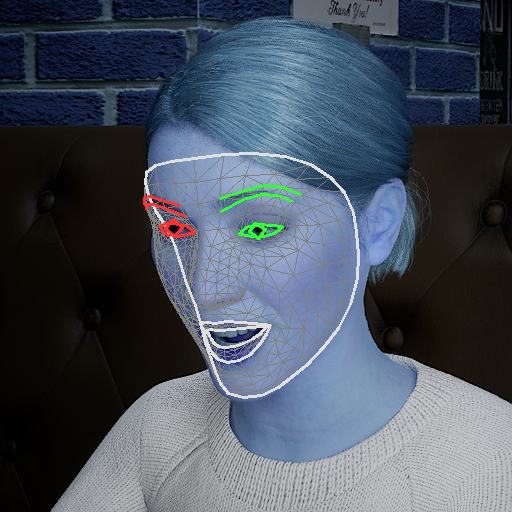

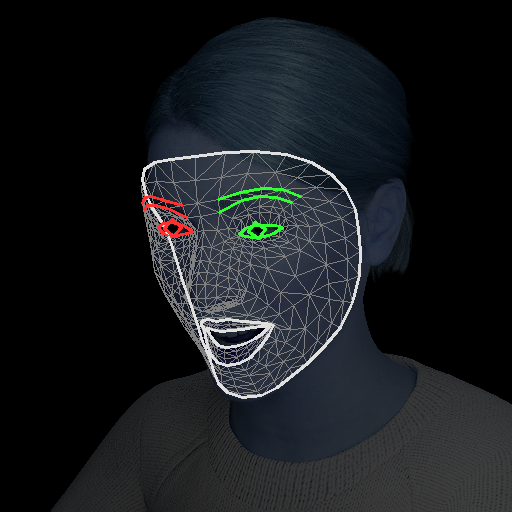

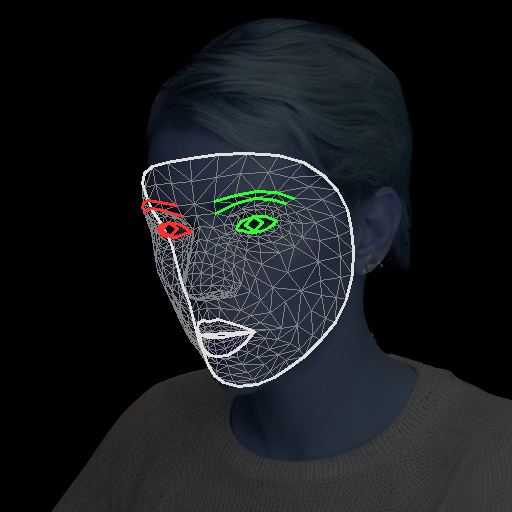

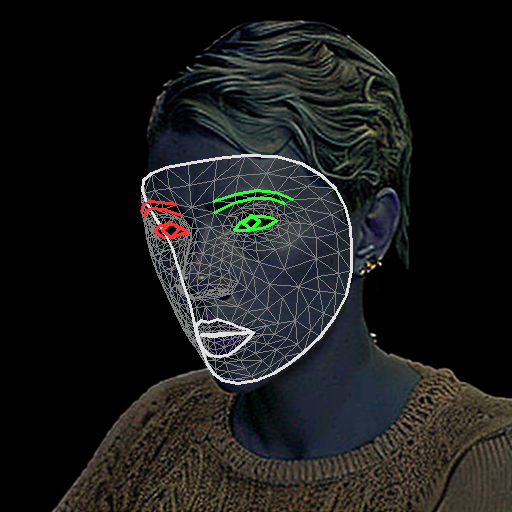

In [9]:
# Run MediaPipe Face Mesh.
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=2,
    min_detection_confidence=0.5) as face_mesh:
  for image in images:
    # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
    image = np.array(image)

    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face landmarks of each face.
    
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    resize_and_show(annotated_image)

In [10]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

help(mp_pose.Pose)

Help on class Pose in module mediapipe.python.solutions.pose:

class Pose(mediapipe.python.solution_base.SolutionBase)
 |  Pose(static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Pose.
 |  
 |  MediaPipe Pose processes an RGB image and returns pose landmarks on the most
 |  prominent person detected.
 |  
 |  Please refer to https://solutions.mediapipe.dev/pose#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Pose
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Pose object.
 |      
 |      Args:
 |        static_i

In [11]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for image in images:
    image = np.array(image)
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    )

    # Draw pose landmarks.
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    resize_and_show(annotated_image)

Nose coordinates: (212.57745361328125, 284.8057861328125)


Nose coordinates: (225.2667236328125, 279.04248046875)


Nose world landmark:
x: -0.16674257814884186
y: -0.5263434052467346
z: -0.33621251583099365
visibility: 0.9995148181915283



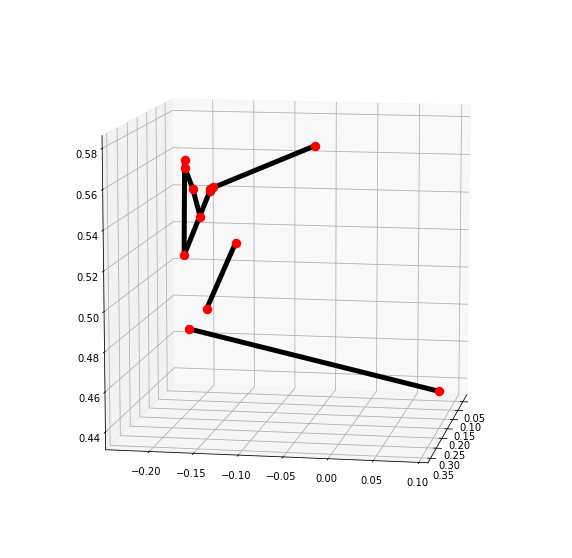

Nose world landmark:


AttributeError: ignored

In [12]:
# Run MediaPipe Pose and plot 3d pose world landmarks.
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for image in images:
    image = np.array(image)
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print the real-world 3D coordinates of nose in meters with the origin at
    # the center between hips.
    print('Nose world landmark:'),
    print(results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE])
    
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [ ]:
# Run MediaPipe Pose with `enable_segmentation=True` to get pose segmentation.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, 
    model_complexity=2, enable_segmentation=True) as pose:
  for image in images:
    results = pose.process(cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB))

    # Draw pose segmentation.
    print(f'Pose segmentation')
    annotated_image = image.copy()
    red_img = np.zeros_like(annotated_image, dtype=np.uint8)
    red_img[:, :] = (255,255,255)
    segm_2class = 0.2 + 0.8 * results.segmentation_mask
    segm_2class = np.repeat(segm_2class[..., np.newaxis], 3, axis=2)
    annotated_image = annotated_image * segm_2class + red_img * (1 - segm_2class)
    resize_and_show(annotated_image)

In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

# For static images:
IMAGE_FILES = []
with mp_holistic.Holistic(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    refine_face_landmarks=True) as holistic:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if results.pose_landmarks:
      print(
          f'Nose coordinates: ('
          f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
          f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_height})'
      )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose, left and right hands, and face landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.face_landmarks,
        mp_holistic.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_tesselation_style())
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.
        get_default_pose_landmarks_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_pose_landmarks_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()